In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns_to_drop, axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge, LogisticRegression

In [6]:
embarked_imputer = SimpleImputer(strategy = 'most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).flatten()

In [7]:
age_imputer = IterativeImputer(estimator = BayesianRidge(), random_state = 63)
df['Age'] = age_imputer.fit_transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [8]:
ohe_columns = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns = ohe_columns, drop_first = True, dtype = int)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [9]:
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 63)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
columns_to_scale = ['Age', 'Fare']
x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [16]:
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

train_precision = [train_report['0']['precision'], train_report['1']['precision']]
test_precision = [test_report['0']['precision'], test_report['1']['precision']]

train_recall = [train_report['0']['recall'], train_report['1']['recall']]
test_recall = [test_report['0']['recall'], test_report['1']['recall']]

train_f1 = [train_report['0']['f1-score'], train_report['1']['f1-score']]
test_f1 = [test_report['0']['f1-score'], test_report['1']['f1-score']]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

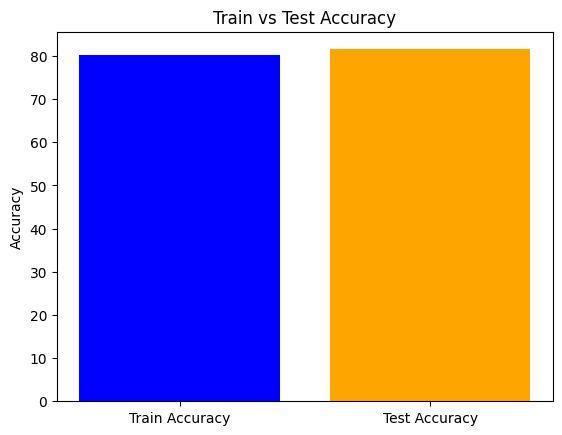

In [17]:
import matplotlib.pyplot as plt

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

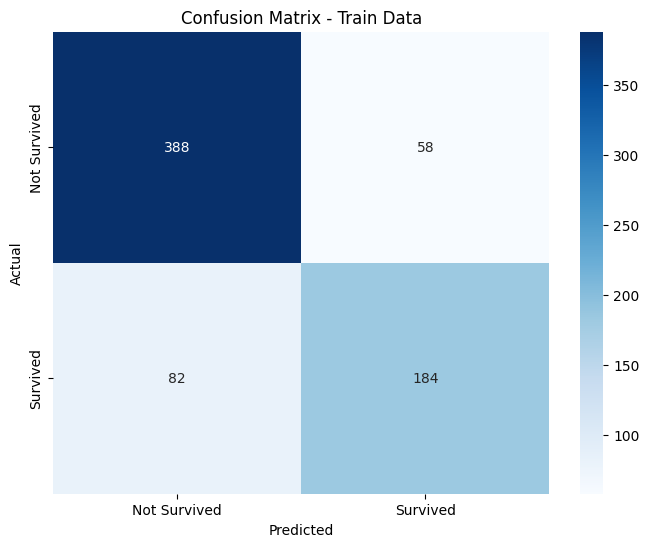

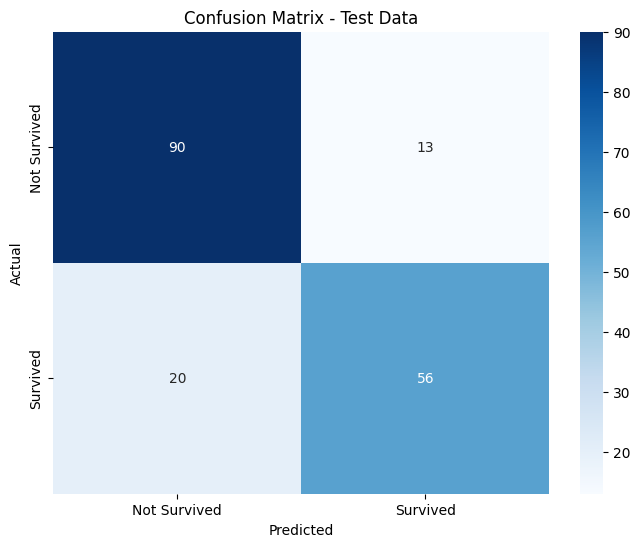

In [18]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

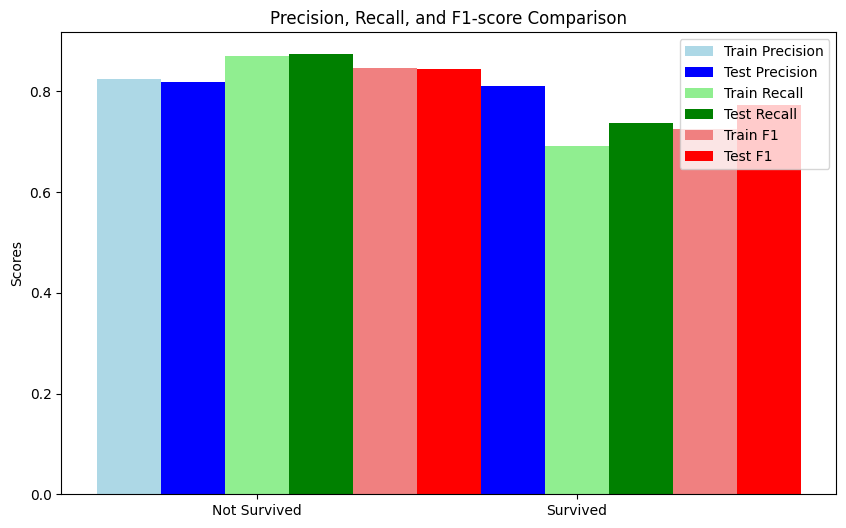

In [19]:
labels = ['Not Survived', 'Survived']
x_axis = range(2)

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
ax.bar(x_axis, train_precision, width, label='Train Precision', color='lightblue')
ax.bar([p + width for p in x_axis], test_precision, width, label='Test Precision', color='blue')

ax.bar([p + 2*width for p in x_axis], train_recall, width, label='Train Recall', color='lightgreen')
ax.bar([p + 3*width for p in x_axis], test_recall, width, label='Test Recall', color='green')

ax.bar([p + 4*width for p in x_axis], train_f1, width, label='Train F1', color='lightcoral')
ax.bar([p + 5*width for p in x_axis], test_f1, width, label='Test F1', color='red')

ax.set_ylabel('Scores')
ax.set_xticks([p + width * 2 for p in x_axis])
ax.set_xticklabels(labels)
ax.legend()

plt.title('Precision, Recall, and F1-score Comparison')
plt.show()

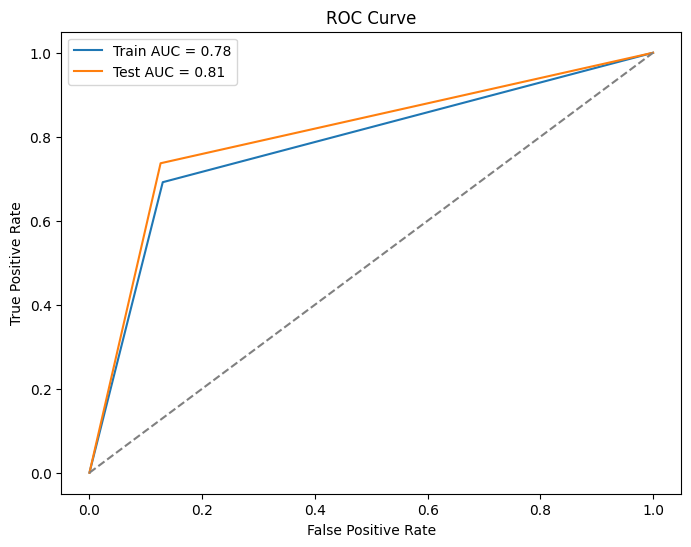

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

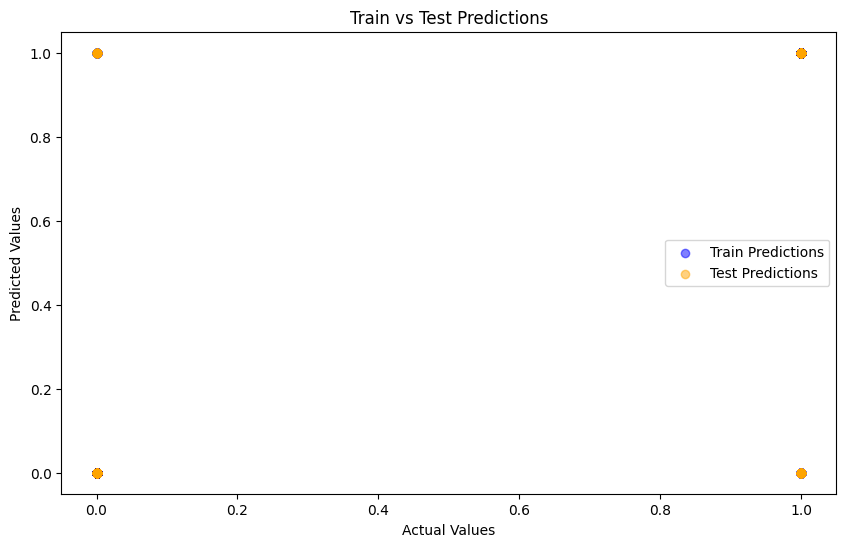

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Predictions', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='orange', label='Test Predictions', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Train vs Test Predictions')
plt.legend()
plt.show()